# Statistics & Public Health

__Sourish Dasgupta__ <br>
__Jun 20, 2022__

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.
The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. 
They are then able to study the captured specimens and monitor the state of WNV spread in the city. <br><br>

__Data Dictionary__
- Year (int64)	Year that the WNV test is performed			
- Week  (int64)	Week that the WNV test is performed			
- Address (string)	 Block	Address of the location of trap.		
- Block (int64)	Block number of address		
- Trap_Id (string) of the trap. Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.	
- Trap_type (string) Type of trap 		
- Date (string)	Date and time that the WNV test is performed 	Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- Mosquito_number (int64) Number of mosquitoes caught in this trap	 These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.	
- Mosquito_ID  (string)	Id for Mosquito species	string		
- WNV  Present  (string) 	Whether West Nile Virus was present in these mosquitos		
- Species (string) Mosquito species	string		
- Lat (float64)	Latitude of trap	
- Lon( float64)	Longitude of trap

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Statistics-&amp;-Public-Health" data-toc-modified-id="Statistics-&amp;-Public-Health-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Statistics &amp; Public Health</a></span><ul class="toc-item"><li><span><a href="#Loading-Library" data-toc-modified-id="Loading-Library-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Library</a></span></li><li><span><a href="#Important-Functions" data-toc-modified-id="Important-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Important Functions</a></span></li><li><span><a href="#Loading-data-&amp;-exploring-high-level-details" data-toc-modified-id="Loading-data-&amp;-exploring-high-level-details-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading data &amp; exploring high-level details</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Structuring-the-Column-Name" data-toc-modified-id="Structuring-the-Column-Name-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Structuring the Column Name</a></span></li><li><span><a href="#Handling-the-Date-data-type" data-toc-modified-id="Handling-the-Date-data-type-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Handling the Date data type</a></span></li><li><span><a href="#Removing-Duplicate-Columns-and-Rows" data-toc-modified-id="Removing-Duplicate-Columns-and-Rows-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Removing Duplicate Columns and Rows</a></span><ul class="toc-item"><li><span><a href="#Handling-Duplicate-Rows" data-toc-modified-id="Handling-Duplicate-Rows-1.4.3.1"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span>Handling Duplicate Rows</a></span></li><li><span><a href="#Exploring-the-Duplicate-and-the-redundant-Columns" data-toc-modified-id="Exploring-the-Duplicate-and-the-redundant-Columns-1.4.3.2"><span class="toc-item-num">1.4.3.2&nbsp;&nbsp;</span>Exploring the Duplicate and the redundant Columns</a></span></li></ul></li></ul></li><li><span><a href="#Basic-Analysis" data-toc-modified-id="Basic-Analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Basic Analysis</a></span><ul class="toc-item"><li><span><a href="#Convert-the-WNV-Present-column-into-a-binary-column" data-toc-modified-id="Convert-the-WNV-Present-column-into-a-binary-column-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Convert the WNV Present column into a binary column</a></span></li><li><span><a href="#Create-dummy-variables-from-the-Trap-type-column." data-toc-modified-id="Create-dummy-variables-from-the-Trap-type-column.-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Create dummy variables from the Trap type column.</a></span></li><li><span><a href="#What-is-the-average-number-of-mosquitoes-for-each-month?-What-trends-do-you-notice?" data-toc-modified-id="What-is-the-average-number-of-mosquitoes-for-each-month?-What-trends-do-you-notice?-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>What is the average number of mosquitoes for each month? What trends do you notice?</a></span></li></ul></li><li><span><a href="#Statistical-Analysis" data-toc-modified-id="Statistical-Analysis-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Statistical Analysis</a></span><ul class="toc-item"><li><span><a href="#Is-there-a-statistically-significant-difference-between-the-different-mosquito-species-when-looking-at-the-occurrence-of-West-Nile-Virus?" data-toc-modified-id="Is-there-a-statistically-significant-difference-between-the-different-mosquito-species-when-looking-at-the-occurrence-of-West-Nile-Virus?-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?</a></span></li><li><span><a href="#Which-columns-are-positively-correlated-with-the-number-of-mosquitoes-caught?Which-columns-are-negatively-correlated?Are-these-correlations-statistically-significant?" data-toc-modified-id="Which-columns-are-positively-correlated-with-the-number-of-mosquitoes-caught?Which-columns-are-negatively-correlated?Are-these-correlations-statistically-significant?-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Which columns are positively correlated with the number of mosquitoes caught?Which columns are negatively correlated?Are these correlations statistically significant?</a></span><ul class="toc-item"><li><span><a href="#Handling-categorical-variables" data-toc-modified-id="Handling-categorical-variables-1.6.2.1"><span class="toc-item-num">1.6.2.1&nbsp;&nbsp;</span>Handling categorical variables</a></span></li><li><span><a href="#Exploring-the-correlation-between-the-mosquito_number-and-all-the-other-columns" data-toc-modified-id="Exploring-the-correlation-between-the-mosquito_number-and-all-the-other-columns-1.6.2.2"><span class="toc-item-num">1.6.2.2&nbsp;&nbsp;</span>Exploring the correlation between the <code>mosquito_number</code> and all the other columns</a></span></li><li><span><a href="#Exploring-the--statistically-significance-of-the-correlation-coefficient-between-the-mosquito_number-and-all-the-other-columns" data-toc-modified-id="Exploring-the--statistically-significance-of-the-correlation-coefficient-between-the-mosquito_number-and-all-the-other-columns-1.6.2.3"><span class="toc-item-num">1.6.2.3&nbsp;&nbsp;</span>Exploring the  statistically significance of the correlation coefficient between the <code>mosquito_number</code> and all the other columns</a></span></li></ul></li></ul></li><li><span><a href="#Advanced-Statistical-Analysis" data-toc-modified-id="Advanced-Statistical-Analysis-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Advanced Statistical Analysis</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Variable-selection-for-model" data-toc-modified-id="Variable-selection-for-model-1.7.1.1"><span class="toc-item-num">1.7.1.1&nbsp;&nbsp;</span>Variable selection for model</a></span></li><li><span><a href="#Model-1.1" data-toc-modified-id="Model-1.1-1.7.1.2"><span class="toc-item-num">1.7.1.2&nbsp;&nbsp;</span>Model 1.1</a></span></li><li><span><a href="#Model-1.2" data-toc-modified-id="Model-1.2-1.7.1.3"><span class="toc-item-num">1.7.1.3&nbsp;&nbsp;</span>Model 1.2</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.7.1.4"><span class="toc-item-num">1.7.1.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Variable-selection-for-model" data-toc-modified-id="Variable-selection-for-model-1.7.2.1"><span class="toc-item-num">1.7.2.1&nbsp;&nbsp;</span>Variable selection for model</a></span></li><li><span><a href="#Model-1.1" data-toc-modified-id="Model-1.1-1.7.2.2"><span class="toc-item-num">1.7.2.2&nbsp;&nbsp;</span>Model 1.1</a></span></li><li><span><a href="#Model-1.2" data-toc-modified-id="Model-1.2-1.7.2.3"><span class="toc-item-num">1.7.2.3&nbsp;&nbsp;</span>Model 1.2</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.7.2.4"><span class="toc-item-num">1.7.2.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Loading Library

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline

## Important Functions

In [2]:
def column_rename(names):
    
    '''
    Replacing the space within the column name with "_" and changing the name into lower case.
    
    Parameters
    ----------
    data: A list as input
    
    Returns
    -------
    ret: A list output, the treated name list of the dataframe
    
    Examples
    --------
    >>>> data= ["col 1","col 2"]
    >>>> column_rename(data)
    ["col_1","col_2"]
    '''
    
    
    names = names.str.lower()
    treated_name =[]
    for name in names:
        treated_name.append(name.replace(" ","_"))
    return treated_name

In [3]:
def coefficient_Visualization(model,title,model_type="linear"):
    '''
    Visualization of the impact of coefficient over the outcome
    
    Parameters
    ----------
    model:
    title:"string"
    model_type:"string"
    
    Returns
    -------
    ret: A a barh plot as output,
    
    '''
    coefficient_df = pd.DataFrame({"Coefficient": model.params,
                                              "p_value": model.pvalues})

    coefficient_df.sort_values(by="Coefficient", ascending=True, inplace=True)
    coefficient_df.drop('const', inplace=True)
    
    if model_type=="logistic":
        coefficient_df["Coefficient"] = np.exp(coefficient_df["Coefficient"])
    

    colors = []
    for coefficient in coefficient_df['Coefficient']:
        if (coefficient > 0):
            colors.append("blue")
        else:
            colors.append("red")

    plt.figure(figsize=(20,5))
    plt.barh(coefficient_df.index, 
             coefficient_df['Coefficient'],
             color=colors)
    plt.title(title)
    plt.ylabel("Variable")

    plt.xlabel("Effects)")
    plt.xticks([])


    plt.show()

## Loading data & exploring high-level details

In [4]:
# Load the data
mosquito_df = pd.read_csv('mosquito_data_part_2.csv')

In [5]:
# Take a look at our dataframe
mosquito_df.sample(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
10464,2010,36,100XX W OHARE AIRPORT,T913,GRAVID,2010-09-13 00:09:00,7,negative,CULEX PIPIENS,41.977738,-87.880969,9
2126,2018,23,89XX S MUSKEGON AVE,T099,GRAVID,2018-06-08 00:06:00,1,negative,CULEX TERRITANS,41.733188,-87.555629,6
5792,2014,34,22XX W 51ST ST,T061,GRAVID,2014-08-21 00:08:00,6,negative,CULEX RESTUANS,41.801048,-87.680425,8
16444,2007,35,127XX S DOTY AVE,T115,CDC,2007-09-05 00:09:00,50,positive,CULEX PIPIENS,41.662391,-87.590179,9
2228,2017,38,42XX W 65TH ST,T235,GRAVID,2017-09-21 00:09:00,1,negative,CULEX RESTUANS,41.774841,-87.728006,9


In [6]:
# Basic information about the dataset
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


## Data Cleaning 

### Structuring the Column Name 
Replacing the blanks spaces between words  with "_" and changing to lower case to retain uniformity in the column name

_column_rename function to standardized nomenclature for the column names_

In [7]:
# setting a standard nomenclature for the column names
mosquito_df.columns = column_rename(mosquito_df.columns)
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             18495 non-null  int64  
 1   week             18495 non-null  int64  
 2   address_block    18495 non-null  object 
 3   trap             18495 non-null  object 
 4   trap_type        18495 non-null  object 
 5   date             18495 non-null  object 
 6   mosquito_number  18495 non-null  int64  
 7   wnv_present      18495 non-null  object 
 8   species          18495 non-null  object 
 9   lat              18495 non-null  float64
 10  lon              18495 non-null  float64
 11  month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


### Handling the Date data type

In [8]:
# converting the datatype
mosquito_df["date"]= mosquito_df["date"].astype("datetime64")
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             18495 non-null  int64         
 1   week             18495 non-null  int64         
 2   address_block    18495 non-null  object        
 3   trap             18495 non-null  object        
 4   trap_type        18495 non-null  object        
 5   date             18495 non-null  datetime64[ns]
 6   mosquito_number  18495 non-null  int64         
 7   wnv_present      18495 non-null  object        
 8   species          18495 non-null  object        
 9   lat              18495 non-null  float64       
 10  lon              18495 non-null  float64       
 11  month            18495 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.7+ MB


For the `date` column the data type is changed from object to datatime

### Removing Duplicate Columns and Rows
#### Handling Duplicate Rows

In [9]:
# Exploring the duplicate rows
duplicate_index = mosquito_df.duplicated(keep=False)
mosquito_df.loc[duplicate_index, :]

,year,week,address_block,trap,trap_type,date,mosquito_number,wnv_present,species,lat,lon,month
187,2019,35,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-29 00:08:00,3,positive,CULEX RESTUANS,41.977738,-87.880969,8
273,2019,34,100XX W OHARE AIRPORT,T901,GRAVID,2019-08-22 00:08:00,16,positive,CULEX RESTUANS,41.977738,-87.880969,8
310,2019,33,100XX W OHARE,T903,GRAVID,2019-08-15 00:08:00,3,positive,CULEX RESTUANS,41.977738,-87.880969,8
341,2019,33,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-15 00:08:00,15,positive,CULEX RESTUANS,41.977738,-87.880969,8
398,2019,32,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-08 00:08:00,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013,29,100XX W OHARE AIRPORT,T912,GRAVID,2013-07-19 00:07:00,46,positive,CULEX RESTUANS,41.977738,-87.880969,7
18477,2013,35,100XX W OHARE AIRPORT,T906,GRAVID,2013-08-29 00:08:00,50,positive,CULEX PIPIENS,41.977738,-87.880969,8
18486,2016,29,100XX W OHARE AIRPORT,T911,GRAVID,2016-07-21 00:07:00,47,positive,CULEX RESTUANS,41.977738,-87.880969,7
18488,2017,30,100XX W OHARE AIRPORT,T900,GRAVID,2017-07-27 00:07:00,17,positive,CULEX RESTUANS,41.977738,-87.880969,7


In [10]:
# Exploring the duplicate rows %
duplicated_row_count = mosquito_df.duplicated(keep=False).sum()
print(f"Total number of rows found :{mosquito_df.shape[0]}")
print(f"Total duplicate rows found :{duplicated_row_count}")

Total number of rows found :18495
Total duplicate rows found :862


In [11]:
# Droping the 662 duplicate rows from the dataset
mosquito_df.drop_duplicates(inplace=True)
duplicated_row_count =mosquito_df.duplicated().sum()

# Cross validating the results
print(f"Total number of rows found :{mosquito_df.shape[0]}")
print(f"Total duplicate rows found :{duplicated_row_count}")

Total number of rows found :17837
Total duplicate rows found :0


From the initial exploration, out of 18495 rows , 862 rows are found to be duplicate and therefore removed from the dataset. After removing the  duplicate rows the  remaining dataset consists of 17837 rows and 12 columns. 

#### Exploring the Duplicate and the redundant Columns
To handle the duplicate columns the strategies adopted are as follows
- checking the columns to find identical columns based on existing values
- checking the columns to find identical columns based on the inert relationship . For example `year` column with  `date` column.

In [12]:
#Transpose the Column and check for duplicate column
mosquito_df_transpose = mosquito_df.T
print(f"Total duplicate columns found :{mosquito_df_transpose.duplicated().sum()}")

Total duplicate columns found :0


There was no duplicate column found based on their existing values. Now based on the second strategy, `week`,`year` and `month` are explored with respect to the `date` column to find the level of similarities.

In [13]:
# Date vs Year
date_year = ((mosquito_df[mosquito_df['year']== mosquito_df['date'].dt.isocalendar().year].shape[0])/mosquito_df.shape[0])*100
print(f"The 'date' and the 'year' columns are {date_year}% similar")

# Date vs MONTH
date_month = ((mosquito_df[mosquito_df['month']== mosquito_df['date'].dt.month].shape[0])/mosquito_df.shape[0])*100
print(f"The 'date' and the 'month' columns are {date_month}% similar")

# Date vs WEEK
date_week = ((mosquito_df[mosquito_df['week']== mosquito_df['date'].dt.isocalendar().week].shape[0])/mosquito_df.shape[0])*100
print(f"The 'date' and the 'week' columns are {round(date_week,2)}% similar")



The 'date' and the 'year' columns are 100.0% similar
The 'date' and the 'month' columns are 100.0% similar
The 'date' and the 'week' columns are 66.47% similar


Analyzing the non identical values of the `week` column with respect to the `date` column

In [14]:
non_indentical_date_week= mosquito_df[mosquito_df['week']!= mosquito_df['date'].dt.isocalendar().week].reset_index()
non_indentical_date_week["week_as_per_year"]= non_indentical_date_week["date"].dt.isocalendar().week
non_indentical_date_week["difference"] =non_indentical_date_week["week_as_per_year"]-non_indentical_date_week["week"]
non_indentical_date_week["difference"].value_counts(normalize =True)*100

1    88.277592
2     8.996656
3     1.722408
4     0.652174
5     0.351171
Name: difference, dtype: float64

As per the above results, within 33.53% of the values in `week` column which are not similar to week number generated from the `date` column, 88.25% of value has a difference of "one" and 8.99% has the difference of "two" and the remaining percentage for the difference of "three", "four" and "five" is  very low.<br>
Now it can be concluded that the disparity in the `week`column with respect to the week number generated from the `date`column is the result of the incorrect data entry. Therefore the values of the `week` column is replaced with the week number generated from the `date` column.

In [15]:
mosquito_df["week"] = mosquito_df['date'].dt.isocalendar().week
date_week = ((mosquito_df[mosquito_df['week']== mosquito_df['date'].dt.isocalendar().week].shape[0])/mosquito_df.shape[0])*100
print(f"The 'date' and the 'week' columns are {round(date_week,2)}% similar")

The 'date' and the 'week' columns are 100.0% similar


In [16]:
# Droping the Date Column 
mosquito_df.drop(["date"],axis=1,inplace=True)
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             17837 non-null  int64  
 1   week             17837 non-null  UInt32 
 2   address_block    17837 non-null  object 
 3   trap             17837 non-null  object 
 4   trap_type        17837 non-null  object 
 5   mosquito_number  17837 non-null  int64  
 6   wnv_present      17837 non-null  object 
 7   species          17837 non-null  object 
 8   lat              17837 non-null  float64
 9   lon              17837 non-null  float64
 10  month            17837 non-null  int64  
dtypes: UInt32(1), float64(2), int64(3), object(5)
memory usage: 2.2+ MB


Finally based on the above result, it can  be  concluded that the '`date` column is represent by the `year`,`month` and `week` column separately . Therefore the `date` column is dropped from the dataset 

## Basic Analysis

### Convert the WNV Present column into a binary column 

Exploring the categories in `wnv_present`column

In [17]:
mosquito_df["wnv_present"].unique()

array(['negative', 'positive'], dtype=object)

Replacing the "negative" and "positive" value  in the `wnv_present` with 0 and 1 respectively 

In [18]:
# replacing the WNV present column with dummy variable
mosquito_df['wnv_present'] = mosquito_df['wnv_present'].map({"negative": 0,"positive": 1})
mosquito_df["wnv_present"].unique()

array([0, 1])

### Create dummy variables from the Trap type column.

Exploring the categories in `trap_type`column

In [19]:
trap_category = mosquito_df["trap_type"].value_counts(normalize=True)*100
trap_category

GRAVID      95.856927
CDC          2.965745
SENTINEL     1.171722
OVI          0.005606
Name: trap_type, dtype: float64

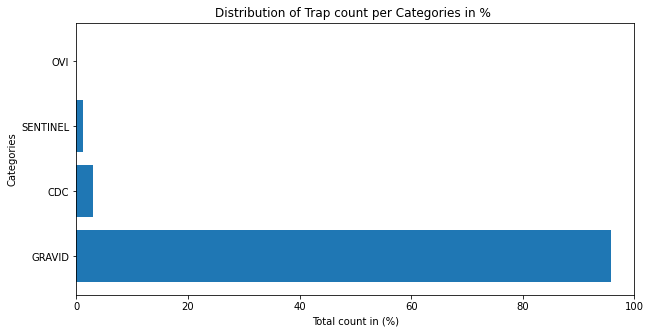

In [20]:
plt.figure(figsize=(10,5))
plt.barh(trap_category.index,trap_category.values,)
plt.ylabel("Categories")
plt.xlim(0,100)
plt.xlabel("Total count in (%)")
plt.title("Distribution of Trap count per Categories in % ")
plt.show()

As the "SENTINEL","CDC" and "OVI" trap_type count are significantly low compare to the "GRAVLE" trap_type which alone represent 95.86 % of the entire data set , two possible strategies can be adopted
- Strategy_1: Converting the `trap_type` column into dummy variable and droping the "OVI" as it represent below 1% of the overall dataset
- Strategy_2: Converting the `trap_type` column into binary column by mapping "GRAVEL" type as <b>1</b> and  grouping "SENTINEL","CDC" and "OVI" under a single label as "others" and mapped as <b>0</b> 

**Strategy_1**
Converting into dummy variables

In [22]:
# Creating dummy variables 

# Adding  prefix 
# dummy_trap_type = pd.get_dummies(mosquito_df["trap_type"],prefix="traptype")


dummy_trap_type = pd.get_dummies(mosquito_df["trap_type"])
dummy_trap_type= dummy_trap_type.drop(["OVI"],axis=1)
dummy_trap_type.shape

(17837, 3)

Merging the dummy variable in the `mosquito_df` dataframe and dropping the `trap_type` column 

In [23]:
# Adding the Dummy Variable to exisiting mosquito_df dataframe
df = [mosquito_df,dummy_trap_type]
mosquito_df_strategy_1=pd.concat(df,axis=1)

# renaming the column name as the column naming standard of the dateframe
mosquito_df_strategy_1.columns = column_rename(mosquito_df_strategy_1.columns)

In [24]:
# droping the wnv_present column
mosquito_df_strategy_1 = mosquito_df_strategy_1.drop(["trap_type"],axis=1)
mosquito_df_strategy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             17837 non-null  int64  
 1   week             17837 non-null  UInt32 
 2   address_block    17837 non-null  object 
 3   trap             17837 non-null  object 
 4   mosquito_number  17837 non-null  int64  
 5   wnv_present      17837 non-null  int64  
 6   species          17837 non-null  object 
 7   lat              17837 non-null  float64
 8   lon              17837 non-null  float64
 9   month            17837 non-null  int64  
 10  cdc              17837 non-null  uint8  
 11  gravid           17837 non-null  uint8  
 12  sentinel         17837 non-null  uint8  
dtypes: UInt32(1), float64(2), int64(4), object(3), uint8(3)
memory usage: 2.1+ MB


**Strategy_2**
Converting`trap_type`column into binary variables

In [25]:
mosquito_df_strategy_2 = mosquito_df.copy()
mosquito_df_strategy_2["trap_type"] = mosquito_df_strategy_2['trap_type'].map({"GRAVID": 1,"CDC": 0,"SENTINEL":0,"OVI":0})
mosquito_df_strategy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             17837 non-null  int64  
 1   week             17837 non-null  UInt32 
 2   address_block    17837 non-null  object 
 3   trap             17837 non-null  object 
 4   trap_type        17837 non-null  int64  
 5   mosquito_number  17837 non-null  int64  
 6   wnv_present      17837 non-null  int64  
 7   species          17837 non-null  object 
 8   lat              17837 non-null  float64
 9   lon              17837 non-null  float64
 10  month            17837 non-null  int64  
dtypes: UInt32(1), float64(2), int64(5), object(3)
memory usage: 2.2+ MB


**Conclusion -** Based on the above two strategies , <b>Strategy_2</b> is adopted as the `GRAVID` trap type is the most used trap category for the research with 95.6% count among all the four categories. This also reduce the chances of adding insignificant features to the data set for future modeling. 

### What is the average number of mosquitoes for each month? What trends do you notice?

In [32]:
# counting the total mosquitoes per month 
mosquito_month_df = mosquito_df.groupby(["month"]).agg({"mosquito_number":["sum"]})
mosquito_month_df.columns=["total_mosquitoes_per_month"]

# Range of data set in terms of number of year 
yr = len(mosquito_df["year"].value_counts())

# average mosquito per month 
average = mosquito_month_df["total_mosquitoes_per_month"]/yr

#appeding to the average data into dataframe
mosquito_month_df["average_per_month"] = average.round(2)


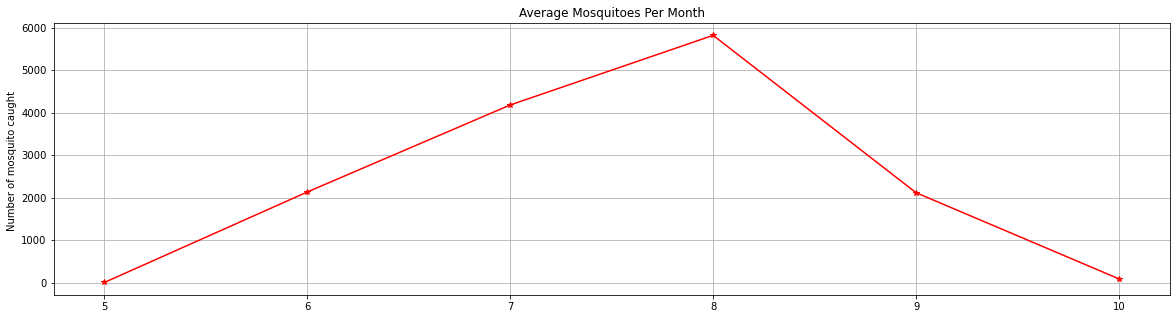

In [31]:
plt.figure(figsize=(20,5))
plt.plot(mosquito_month_df.index,mosquito_month_df["average_per_month"],c="red",marker="*")
# plt.bar(mosquito_month_df.index,mosquito_month_df["average_per_month"])
plt.ylabel("Number of mosquito caught ")
plt.title("Average Mosquitoes Per Month")
plt.grid()
plt.show()

**Conclusion -** Based on the above graph, it can be inferred that the average number of mosquitoes per month increase at the constant level from the month of May to August and then gradually decrease to the same level from where it started, in the next two months.<br>

This trend line clear indicates that the average number of mosquitoes per month has a strong relation with the season as it reaches its max level (close to the 6000 mark) in the peek summer and then slowly reduced to zero towards the winter.  


## Statistical Analysis

### Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?



Creating a table of mosquito species based on the occurrence of West Nile Virus

In [33]:
species_wnv = mosquito_df.groupby(["wnv_present","species",]).agg({"wnv_present":"count"})
species_wnv = species_wnv.unstack()
species_wnv.columns = ["CULEX PIPIENS","CULEX RESTUANS","CULEX SALINARIUS","CULEX TERRITANS"]
species_wnv.rename(index ={1:"Postive",0:"Negative"},inplace=True)
species_wnv_df = species_wnv.T
species_wnv_df

wnv_present,Negative,Postive
CULEX PIPIENS,4074,1237
CULEX RESTUANS,9309,2078
CULEX SALINARIUS,215,7
CULEX TERRITANS,903,14


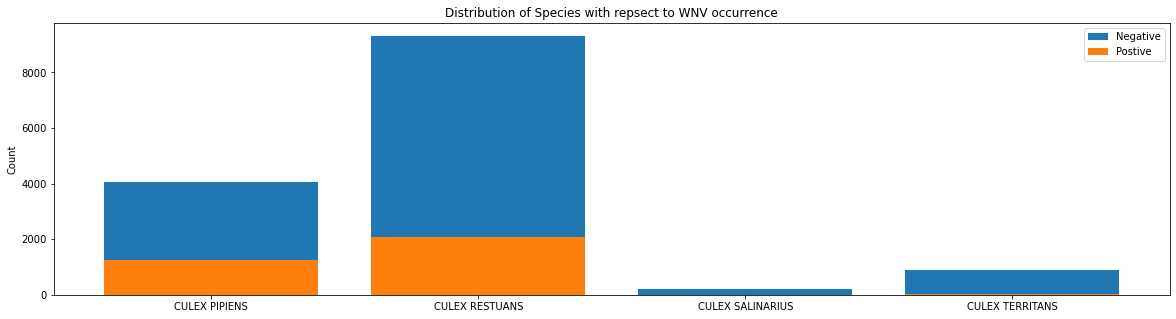

In [34]:
plt.figure(figsize=(20,5))
plt.bar(species_wnv_df.index,species_wnv_df["Negative"],label="Negative")
plt.bar(species_wnv_df.index,species_wnv_df["Postive"],label="Postive")
plt.ylabel("Count")
plt.title("Distribution of Species with repsect to WNV occurrence")
plt.legend()
plt.show()

Based on the above table and visualization, it is visible that the different mosquito species holds certain relations with respect to the occurrence of West Nile Virus, which leads to the Chi Squared test of of Independence across multiple categorical variables to validate statistically. 

 $H_0$: $\text{Species and WNV occurrence are independent.}$<br>  $H_1$: $\text{Species and WNV occurrence are not independent.} $ 

In [35]:
p_values = stats.chi2_contingency(species_wnv_df)[1]
print(f"The p_value is {p_values.round(3)}")

The p_value is 0.0


**Conclusion -** With a p-value of `0.0`, we can reject the null hypothesis that the mosquito species and the occurrence of West Nile Virus are independent. With the help of above table, the visualization and the p-value which is less than `0.05`,it clearly indicates that there is some relationship between mosquito species and the occurrence of West Nile Virus.

### Which columns are positively correlated with the number of mosquitoes caught?Which columns are negatively correlated?Are these correlations statistically significant?

#### Handling categorical variables
Identifying the categorical variables (stored as `object` type in pandas) to convert to numerical representations such that it can applied for statistical calculations.

In [36]:
mosquito_df_strategy_2.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   address_block  17837 non-null  object
 1   trap           17837 non-null  object
 2   species        17837 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


##### trap

In [37]:
uniquie_trap_id = mosquito_df["trap"].nunique()
print(f"The  total number of unique trap ids  are {uniquie_trap_id}")

The  total number of unique trap ids  are 190


In [38]:
trap_efficiency= mosquito_df.groupby(["trap"])["mosquito_number"].mean().sort_values(ascending=False)
trap_efficiency.head(5).round(2)

trap
T917     44.00
T114B    37.78
T138B    35.85
T103     26.50
T240B    26.12
Name: mosquito_number, dtype: float64

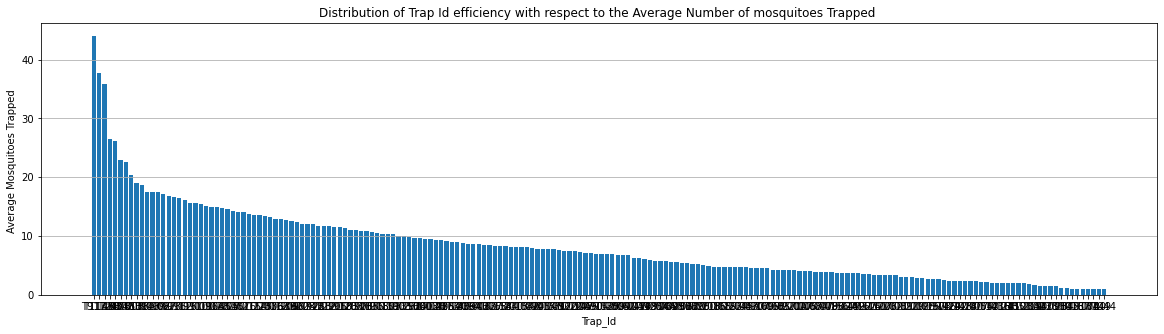

In [39]:
plt.figure(figsize=(20,5))
plt.bar(trap_efficiency.index,trap_efficiency.values)
plt.xlabel("Trap_Id")
plt.ylabel("Average Mosquitoes Trapped ")
plt.title("Distribution of Trap Id efficiency with respect to the Average Number of mosquitoes Trapped ")
plt.grid(axis="y")
plt.show()

There are 190 unique trap id which were placed across the city. Based on the above distribution graph ,the trap id are categories into 4 groups as mentioned below, based upon its efficiency i.e average number of mosquitoes trapped per id.
- 1 : 30 and above 
- 2 : 20 - 30
- 3 : 10 - 20
- 4 : below 10

In [40]:
# Creating a dataframe
trap_efficency_df =trap_efficiency.to_frame()
trap_efficency_df.columns = ["Avg_mosquito_trapped"]
trap_efficency_df.head()

# Map the trap  id into group
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

bins = [0,10,20,30,50]
labels =[4,3,2,1]
trap_efficency_df["trap_id_eff"] =pd.cut(trap_efficency_df["Avg_mosquito_trapped"], bins,labels=labels)
trap_efficency_df.head()


,Avg_mosquito_trapped,trap_id_eff
trap,,
T917,44.000000,1
T114B,37.777778,1
T138B,35.846154,1
T103,26.500000,2
T240B,26.121212,2


In [41]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-to_dict/
mosquito_df_strategy_2["trap"]=mosquito_df_strategy_2["trap"].map(trap_efficency_df.to_dict()["trap_id_eff"])
mosquito_df_strategy_2.rename({"trap":"trap_efficiency"},axis=1,inplace =True)
mosquito_df_strategy_2.head()

,year,week,address_block,trap_efficiency,trap_type,mosquito_number,wnv_present,species,lat,lon,month
0,2019,39,100XX W OHARE AIRPORT,3,1,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,3,1,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,3,1,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,3,1,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,4,1,9,0,CULEX RESTUANS,41.657069,-87.546049,9


__Conclusion -__ After making the rating chart for the trap id based on the efficiency of trapping the mosquitoes, the `trap` column is replaced with a new column `trap_efficiency` which contains the rating values of each trap id .<br>

And as the hierarchy of the data hold meaning,the `trap_efficiency` column  was treated as Ordinal column for future modeling. 

##### address_block
Exploring the unique address in the`address_block` column. The strategy adopted was similar to the `trap` column to convert it to a categorical variable. Furthermore both the results were then compared to understand the level of similarity.

In [42]:
uniquie_address = mosquito_df["address_block"].nunique()
print(f"The total number of unique address are {uniquie_address}")

The total number of unique address are 154


In [43]:
mosquito_df.groupby(["address_block"])["trap"].nunique().sort_values(ascending=False)

address_block
100XX W OHARE AIRPORT    21
100XX W OHARE             3
22XX N CANNON DR          3
5XX S CENTRAL AVE         2
1XX N CENTRAL PARK DR     2
                         ..
52XX S NORDICA AVE        1
51XX W 63RD PL            1
51XX N MONT CLARE AVE     1
50XX S UNION AVE          1
3XX W 18TH ST             1
Name: trap, Length: 154, dtype: int64

In [44]:
address_block_mosquito_avg_count= mosquito_df.groupby(["address_block"])["mosquito_number"].mean().sort_values(ascending=False)
address_block_mosquito_avg_count.head(5).round(2)

address_block
115XX S AVENUE L            26.50
41XX N OAK PARK AVE         22.80
101XX S STONY ISLAND AVE    22.00
70XX N MOSELLE AVE          20.30
64XX W STRONG ST            18.64
Name: mosquito_number, dtype: float64

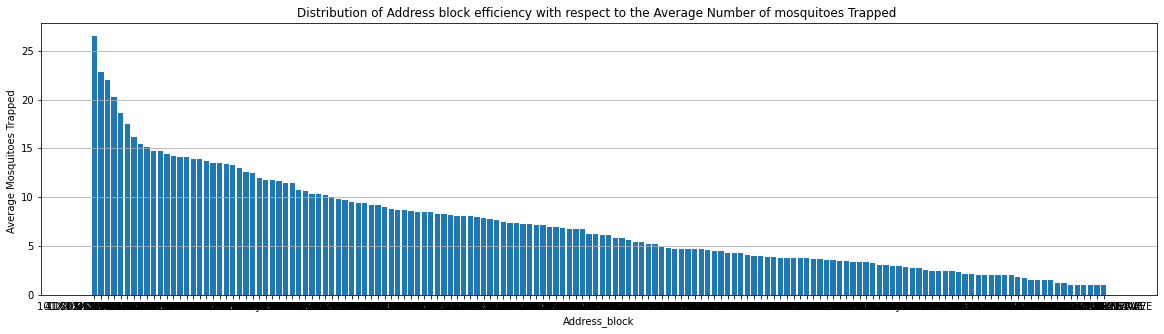

In [45]:
plt.figure(figsize=(20,5))
plt.bar(address_block_mosquito_avg_count.index,address_block_mosquito_avg_count.values)
plt.xlabel("Address_block")
plt.ylabel("Average Mosquitoes Trapped ")
plt.title("Distribution of Address block efficiency with respect to the Average Number of mosquitoes Trapped ")
plt.grid(axis="y")
plt.show()

In [46]:
# Creating a dataframe
address_block_mosquito_avg_count_df =address_block_mosquito_avg_count.to_frame()
address_block_mosquito_avg_count_df.columns = ["Avg_mosquito_trapped"]
address_block_mosquito_avg_count_df.head()

# Map the trap id into group
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

bins = [0,10,20,30,50]
labels =[4,3,2,1]
address_block_mosquito_avg_count_df["add_block_eff"] =pd.cut(address_block_mosquito_avg_count_df["Avg_mosquito_trapped"],
                                                             bins = bins,
                                                             labels=labels)
address_block_mosquito_avg_count_df.head()


,Avg_mosquito_trapped,add_block_eff
address_block,,
115XX S AVENUE L,26.500000,2
41XX N OAK PARK AVE,22.803922,2
101XX S STONY ISLAND AVE,21.997290,2
70XX N MOSELLE AVE,20.300613,2
64XX W STRONG ST,18.642857,3


In [47]:
mosquito_df_strategy_2["address_block"]= mosquito_df_strategy_2["address_block"].map(address_block_mosquito_avg_count_df.to_dict()["add_block_eff"])
mosquito_df_strategy_2.rename({"address_block":"add_block_efficiency"},axis=1,inplace =True)
mosquito_df_strategy_2.head()

,year,week,add_block_efficiency,trap_efficiency,trap_type,mosquito_number,wnv_present,species,lat,lon,month
0,2019,39,3,3,1,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,3,3,1,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,3,3,1,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,3,3,1,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,4,4,1,9,0,CULEX RESTUANS,41.657069,-87.546049,9


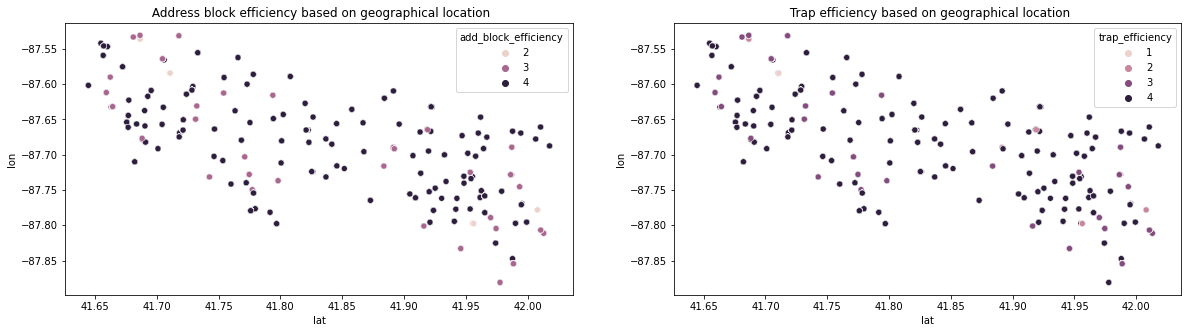

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data=mosquito_df_strategy_2,x ="lat",y ="lon", hue="add_block_efficiency")
plt.title (" Address block efficiency based on geographical location")

plt.subplot(1,2,2)
sns.scatterplot(data=mosquito_df_strategy_2,x ="lat",y ="lon", hue="trap_efficiency")
plt.title (" Trap efficiency based on geographical location")

plt.show()

Exploring the  correlation between two `trap_efficiency`column and `address_block_efficiency` column

In [49]:
corr = np.corrcoef(mosquito_df_strategy_2["add_block_efficiency"],mosquito_df_strategy_2["trap_efficiency"])[0]
print(f"correlation-coefficient between trap_efficency and address block is {round(corr[1],2)}")

correlation-coefficient between trap_efficency and address block is 0.92


In [50]:
mosquito_df_strategy_2.drop(["add_block_efficiency"],axis=1, inplace=True)
mosquito_df_strategy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             17837 non-null  int64  
 1   week             17837 non-null  UInt32 
 2   trap_efficiency  17837 non-null  int64  
 3   trap_type        17837 non-null  int64  
 4   mosquito_number  17837 non-null  int64  
 5   wnv_present      17837 non-null  int64  
 6   species          17837 non-null  object 
 7   lat              17837 non-null  float64
 8   lon              17837 non-null  float64
 9   month            17837 non-null  int64  
dtypes: UInt32(1), float64(2), int64(6), object(1)
memory usage: 2.1+ MB


__Conclusion -__ Based on the all the above results , following observation are drawn
- Only 16 address block out of 154 were represented by more than one trap id , rest all 138 address blocks were represent by one trap id 
- The visual representation were almost identical as seen in the scatter plot.
- High correlation with a coefficient of 0.92

Therefore based on these observation the address block was dropped from the  dataset

##### species
Exploring the categories in `species` column

In [51]:
species_count = mosquito_df["species"].value_counts(normalize=True)*100
species_count

CULEX RESTUANS      63.839211
CULEX PIPIENS       29.775186
CULEX TERRITANS      5.140999
CULEX SALINARIUS     1.244604
Name: species, dtype: float64

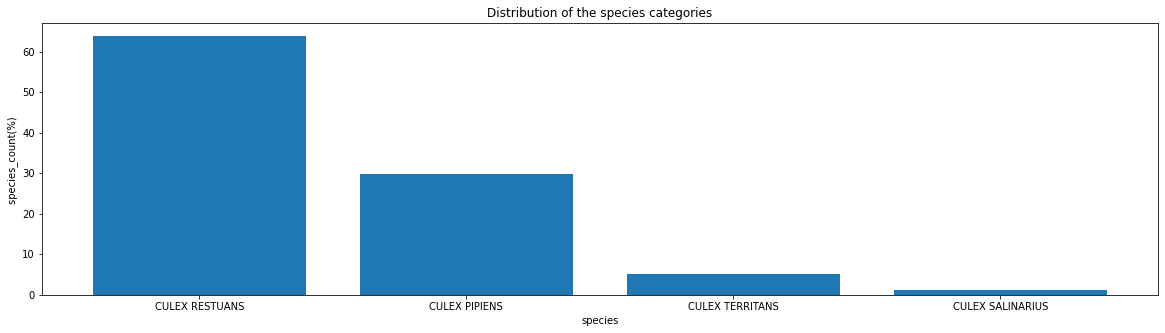

In [52]:
plt.figure(figsize=(20,5))
plt.bar(species_count.index,species_count.values)
plt.xlabel("species")
plt.ylabel("species_count(%) ")
plt.title("Distribution of the species categories")
plt.show()

In [53]:
species = pd.get_dummies(mosquito_df["species"])
species.drop(["CULEX SALINARIUS"],axis=1,inplace =True)

# renaming the column name as the column naming standard of the dateframe
species.columns = column_rename(species.columns)
species.head()

,culex_pipiens,culex_restuans,culex_territans
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


__Conclusion -__`CULEX SALINARIUS` is the least popular species found among all the four categories.Therefore it is dropped from the dummy variable before merging to the main date set <br>
The `species` column was also dropped after combining the dummy variables with the main dataset.

In [54]:
df = [mosquito_df_strategy_2,species]
mosquito_df_treated = pd.concat(df,axis=1)
mosquito_df_treated.drop(["species"],axis=1,inplace=True)
mosquito_df_treated.head(5)

,year,week,trap_efficiency,trap_type,mosquito_number,wnv_present,lat,lon,month,culex_pipiens,culex_restuans,culex_territans
0,2019,39,3,1,2,0,41.977738,-87.880969,9,0,1,0
1,2019,39,3,1,1,0,41.798211,-87.736925,9,0,1,0
2,2019,39,3,1,2,0,41.987245,-87.689417,9,0,1,0
3,2019,39,3,1,1,0,41.953664,-87.724987,9,0,1,0
4,2019,39,4,1,9,0,41.657069,-87.546049,9,0,1,0


In [55]:
mosquito_df_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             17837 non-null  int64  
 1   week             17837 non-null  UInt32 
 2   trap_efficiency  17837 non-null  int64  
 3   trap_type        17837 non-null  int64  
 4   mosquito_number  17837 non-null  int64  
 5   wnv_present      17837 non-null  int64  
 6   lat              17837 non-null  float64
 7   lon              17837 non-null  float64
 8   month            17837 non-null  int64  
 9   culex_pipiens    17837 non-null  uint8  
 10  culex_restuans   17837 non-null  uint8  
 11  culex_territans  17837 non-null  uint8  
dtypes: UInt32(1), float64(2), int64(6), uint8(3)
memory usage: 2.0 MB


#### Exploring the correlation between the `mosquito_number` and all the other columns

In [56]:
# Correlation between independent variables with respect to mosquito_number
X_corr = mosquito_df_treated.corr()
corr = X_corr.loc[X_corr['mosquito_number']!=1,["mosquito_number"]]
corr.T

,year,week,trap_efficiency,trap_type,wnv_present,lat,lon,month,culex_pipiens,culex_restuans,culex_territans
mosquito_number,0.11907,-0.049873,-0.343923,-0.147676,0.389764,0.075713,-0.116071,-0.040942,0.019626,0.066797,-0.149844


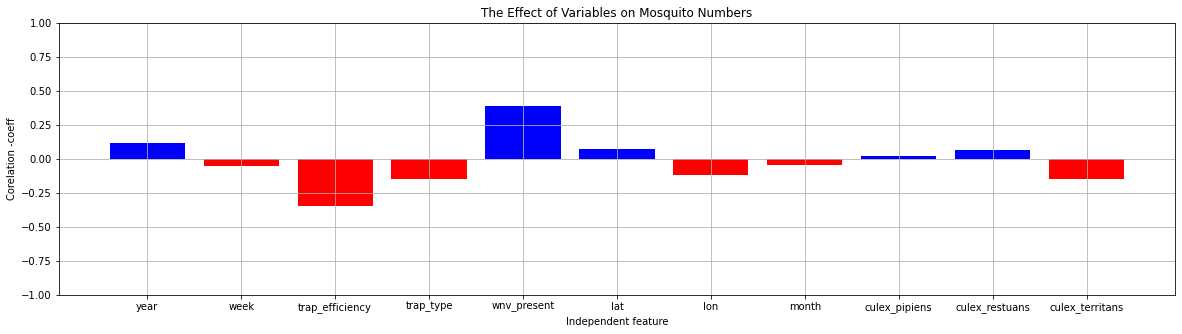

In [57]:
colors = []
for coeff in corr['mosquito_number']:
    if (coeff > 0):
        colors.append("blue")
    else:
        colors.append("red")

plt.figure(figsize=(20,5))
plt.bar(corr.index, corr['mosquito_number'],color=colors)

plt.xlabel("Independent feature")
plt.ylabel("Corelation -coeff")

plt.title("The Effect of Variables on Mosquito Numbers")
plt.ylim(-1,1)
plt.grid()
plt.show()

Based on the above graph , `year`, `wnv_present`, `lat`, `culex_pipiens`,`culex_restuans` has a positive correlation and  `week`, `trap_efficiency`, `trap_type`, `lon`,`month`,`culex_territans` has a negative correlation.

#### Exploring the  statistically significance of the correlation coefficient between the `mosquito_number` and all the other columns

 $H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e `mosquito_number` is independent from all the other columns<br><br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `mosquito_number` is not independent from all the other columns<br><br>

In [58]:
coefficient = []
test =[]
pvalue =[]
index =[]
for col in mosquito_df_treated.columns:
    if (col != "mosquito_number"):
        index.append(col)
        r_correlation, p_value = stats.pearsonr(mosquito_df_treated[col], mosquito_df_treated["mosquito_number"])
        pvalue.append(round(p_value,2))
        if (p_value < 0.05):
            coefficient.append(round(r_correlation, 2))
            test.append("Rejected")
        elif (p_value < 0.05): 
            coefficient.append(round(r_correlation, 2))
            test.append("Fail to Reject")

results = pd.DataFrame({"coefficient":coefficient,"p_value":pvalue,"H0":test},index=index)
results
            

,coefficient,p_value,H0
year,0.12,0.00,Rejected
week,-0.05,0.00,Rejected
trap_efficiency,-0.34,0.00,Rejected
trap_type,-0.15,0.00,Rejected
wnv_present,0.39,0.00,Rejected
lat,0.08,0.00,Rejected
lon,-0.12,0.00,Rejected
month,-0.04,0.00,Rejected
culex_pipiens,0.02,0.01,Rejected
culex_restuans,0.07,0.00,Rejected


**Conclusion-** Based on the above table,correlation coefficient of all the columns with respect to `mosquito_number` are statistically significant as p-value is less than 0.05 and it rejects the null hypothesis.Therefore it can be inferred that `mosquito_number` has a relationship between the all the other columns and validates the assumption of Linearity between independent and dependent variable.

## Advanced Statistical Analysis

###  Linear regression

#### Variable selection for model

In [59]:
X =  mosquito_df_treated.drop(["mosquito_number","wnv_present"],axis=1)
Y =  mosquito_df_treated["mosquito_number"]

print(f"X variable with {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Y variable with {Y.shape[0]} rows" )

X variable with 17837 rows and 10 columns
Y variable with 17837 rows


##### Check for Multicollinearity

<Figure size 1440x1440 with 0 Axes>

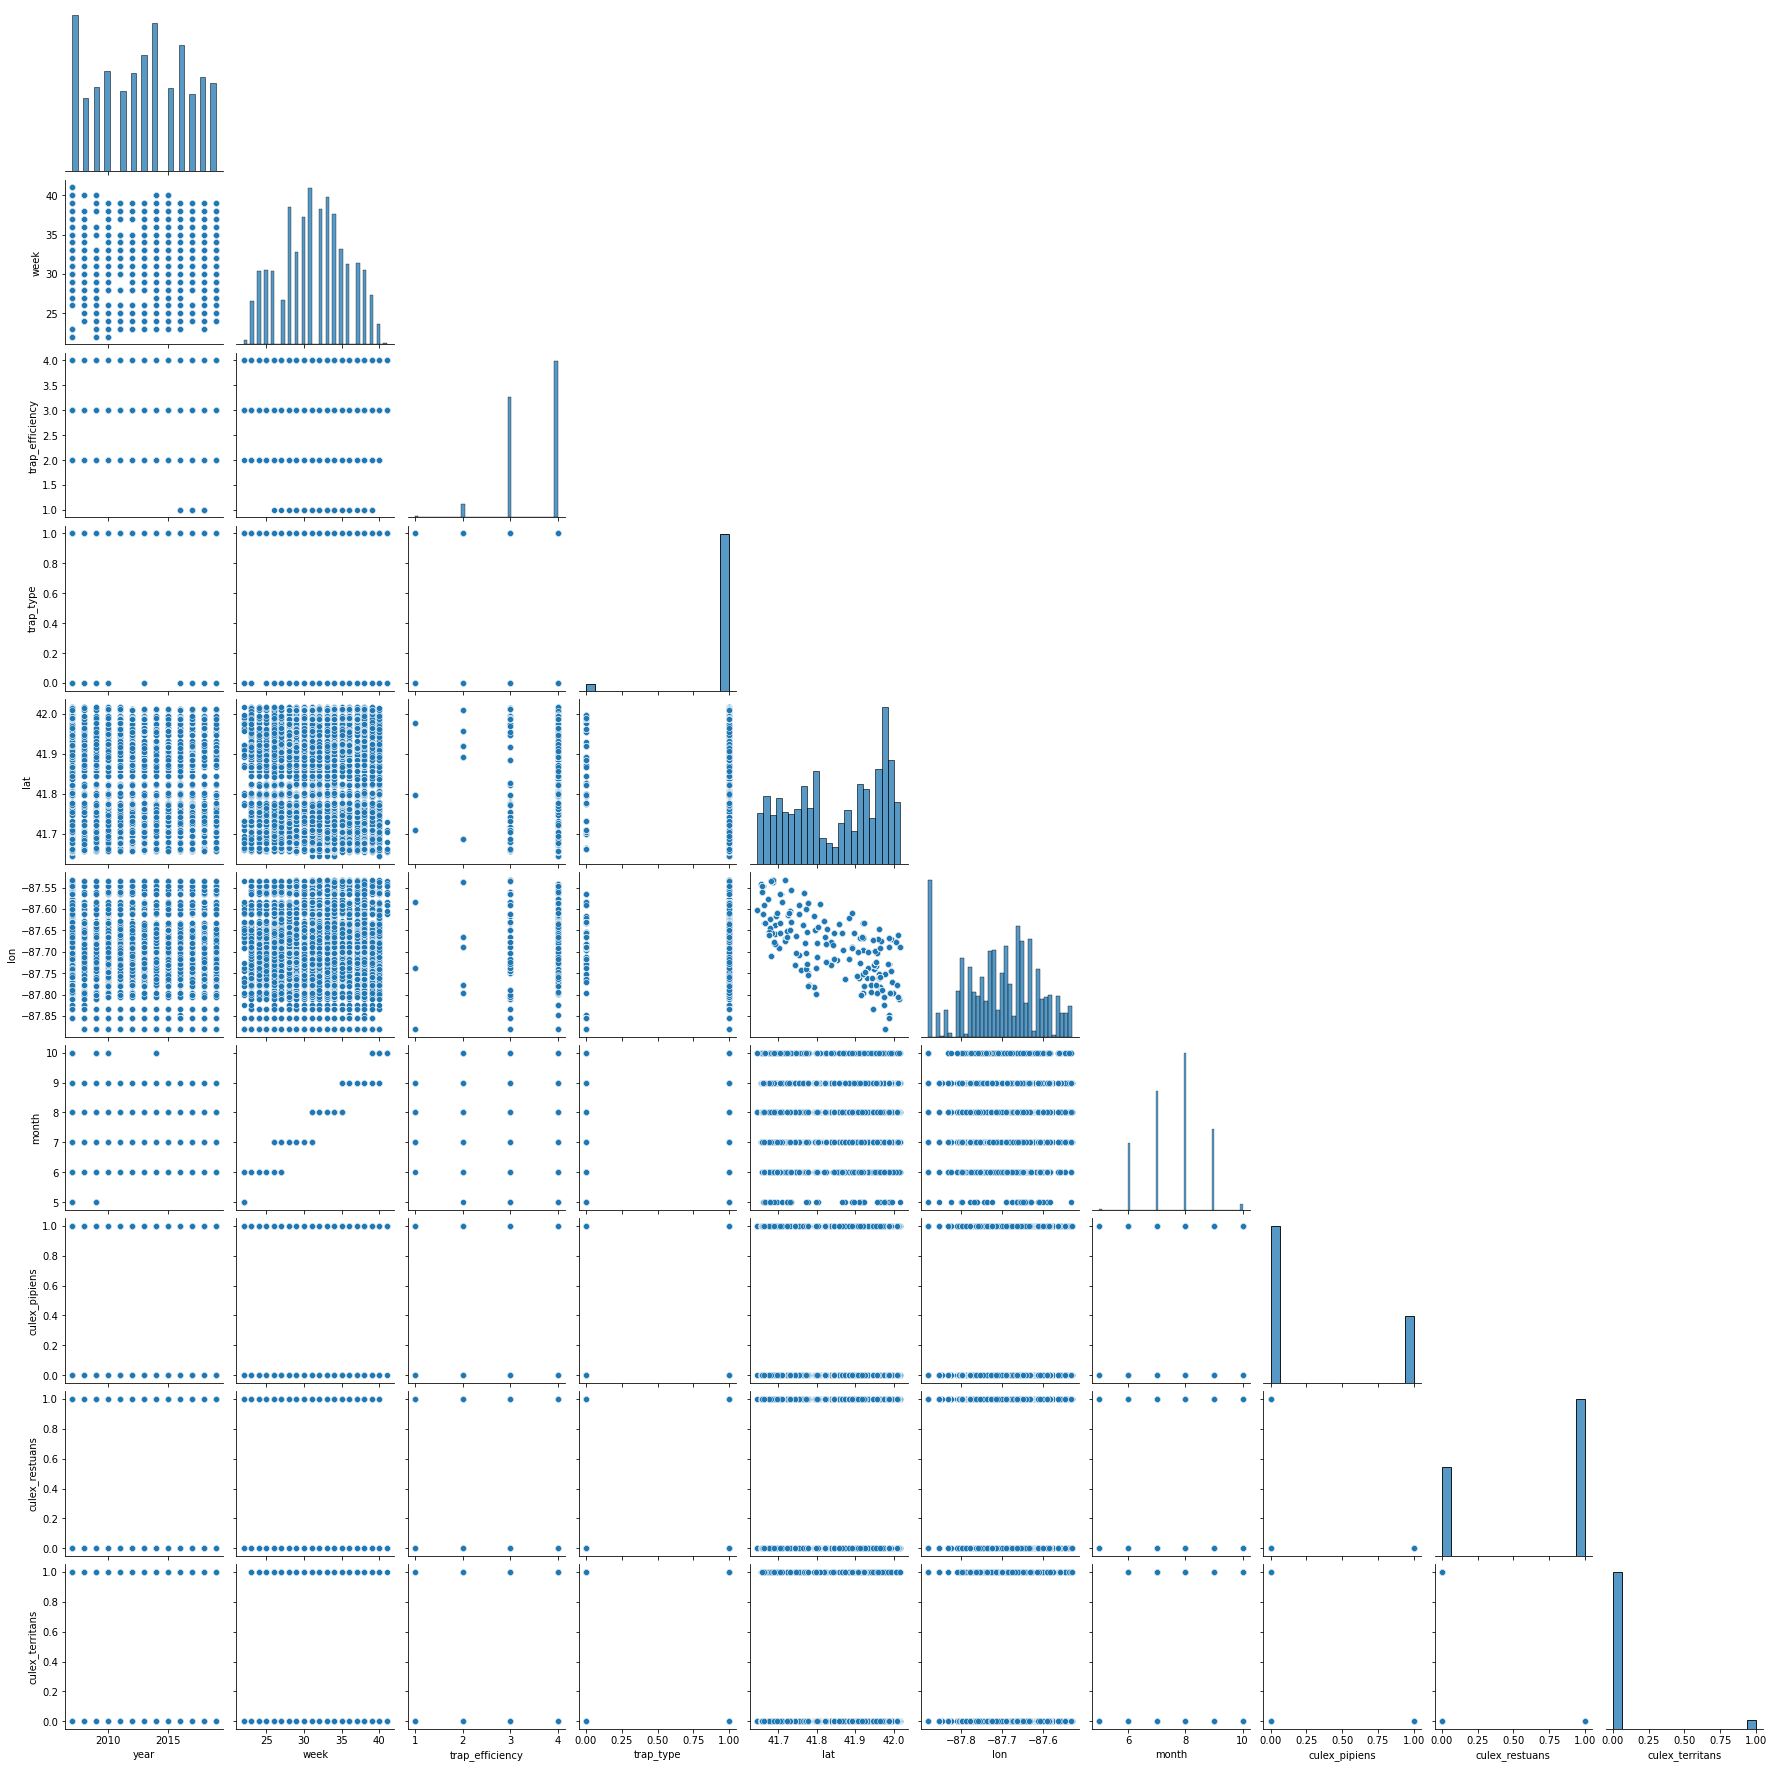

In [60]:
plt.figure(figsize=(20,20))
sns.pairplot(X, corner=True)
plt.show()

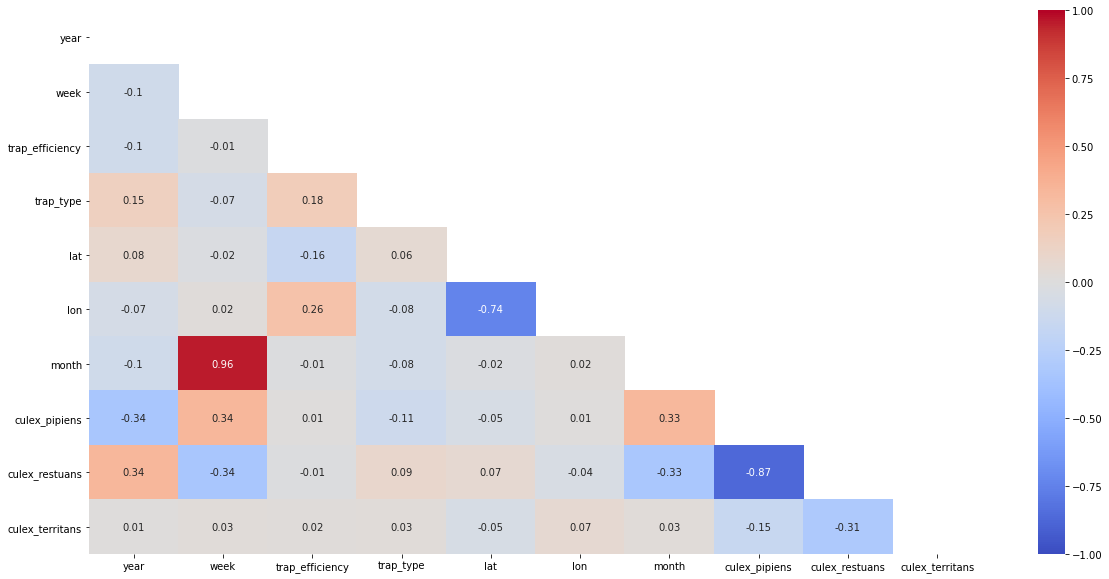

In [61]:
# checking the correlation anomg independent data set 
x_corr = X.corr()
mask = np.triu(x_corr)
plt.figure(figsize=(20,10))
sns.heatmap(x_corr.round(2), annot=True, vmax=1, vmin=-1, cmap="coolwarm", mask=mask)
plt.show()

With the help of above plot and the correlation matrix ,hypothesis test is conducted to validate the significance of the correlation-coefficient for two sets of column<br><br>
**1.Week- Month**<br><br>
$H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e `week` is independent from "`month`<br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `week` is not independent from `month`


In [62]:
r_correlation, p_value = stats.pearsonr(X["week"], X["month"])
print("r_correlation :",r_correlation)
print("p_value :",p_value) 

r_correlation : 0.9582004608544471
p_value : 0.0


 **2.culex_pipiens- culex_restuans**<br><br>
$H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e `culex_restuans` is independent from `culex_pipiens`<br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `culex_restuans` is not independent from `culex_pipiens`

In [63]:
r_correlation, p_value = stats.pearsonr(X["culex_restuans"], X["culex_pipiens"])
print("r_correlation :",r_correlation)
print("p_value :",p_value) 

r_correlation : -0.8651805549195871
p_value : 0.0


In both the cases, the null hypothesis is rejected therefore following steps are adopted to prevent multicollinearity.<br>
- `month` and `week` columns has strongly correlated , therefore ,the `month` column is retained  and the `week` column is dropped.
- The Dummy variable for the species `culex_restuans` and `culex_pipiens` has strong negative correlation. So the `species` column  is converted into binary columns i.e   `culex_restuans` and `culex_pipiens` as 1 and others as 0
- There is a strong correlation found between the `lat` and `lon` column and being a categorical variable , similar approach can adopted like the `Trap`  and `address` column.It two columns are reduced to one column as `location_rank` which represent the rank of the address based on the number of mosquitoes found. 

**Feature modification-1.0 based on above inference**

1. Dropping the `month` column

In [64]:
X.drop(["week"],axis =1,inplace=True)
X.head(5)

,year,trap_efficiency,trap_type,lat,lon,month,culex_pipiens,culex_restuans,culex_territans
0,2019,3,1,41.977738,-87.880969,9,0,1,0
1,2019,3,1,41.798211,-87.736925,9,0,1,0
2,2019,3,1,41.987245,-87.689417,9,0,1,0
3,2019,3,1,41.953664,-87.724987,9,0,1,0
4,2019,4,1,41.657069,-87.546049,9,0,1,0


2. Making a new `species` column and mapped it into binary column where `culex_restuans` and `culex_pipiens` are grouped as 1 and `culex_territians` and `culex_salinarius`as 0 

In [65]:
X["species"] = mosquito_df["species"].map({"CULEX RESTUANS":1,
                                           "CULEX PIPIENS":1,
                                           "CULEX TERRITANS":0,
                                           "CULEX SALINARIUS":0})

X.drop(["culex_territans","culex_restuans","culex_pipiens"],axis=1,inplace=True)
X.head()

,year,trap_efficiency,trap_type,lat,lon,month,species
0,2019,3,1,41.977738,-87.880969,9,1
1,2019,3,1,41.798211,-87.736925,9,1
2,2019,3,1,41.987245,-87.689417,9,1
3,2019,3,1,41.953664,-87.724987,9,1
4,2019,4,1,41.657069,-87.546049,9,1


3. Grouping the `lat` and `lon` column  based on the number of mosquito trapped in the particular locations. 

In [66]:
# Joining the lan and lon  and converted into object type
location_df  = mosquito_df.copy()
location_df["location"] = (mosquito_df["lat"].astype("str"))+"*"+(mosquito_df["lon"].astype("str"))

In [67]:
location = location_df.groupby(["location"])["mosquito_number"].mean().sort_values(ascending=False)
location.sample(5)

location
41.763370922*-87.637872614                5.546875
41.80105230207315*-87.68041914237276     33.000000
41.91613514299318*-87.801091923692        2.000000
41.656789139000004*-87.55944017899999    11.095238
42.01064909489871*-87.8067878096912      50.000000
Name: mosquito_number, dtype: float64

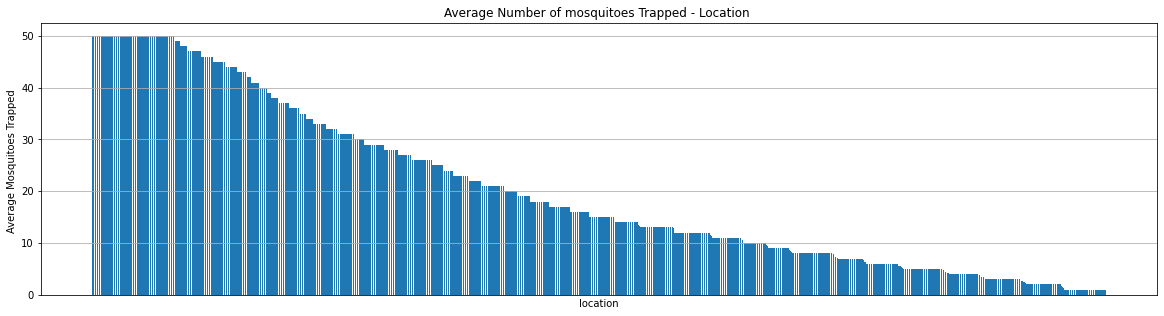

In [68]:
# ploting the distribution of average mosquitoes with repsect to location
plt.figure(figsize=(20,5))
plt.bar(location.index,location.values)
plt.xlabel("location")
plt.xticks([])
plt.ylabel("Average Mosquitoes Trapped ")
plt.title("Average Number of mosquitoes Trapped - Location ")
plt.grid(axis="y")
plt.show()

Based on the above distribution , the locations can be grouped with respect to the average number of mosquito trapped ,into following categories:

- 1 : 40 and above 
- 2 : 40 - 30
- 3 : 30 - 20
- 4 : 20 - 10
- 5 : 10 - below

In [69]:
location = location.to_frame()
# Mapping into groups
bins = [0,10,20,30,40,50]
labels =[5,4,3,2,1]
location["location_rank"] =pd.cut(location["mosquito_number"],bins= bins,labels=labels)
location.head()

,mosquito_number,location_rank
location,,
41.7105447386614*-87.5845579133274,50.0,1
41.695500343511064*-87.60907264060883,50.0,1
41.98859546326069*-87.85446932586969,50.0,1
41.98859595086499*-87.85446626612966,50.0,1
41.94596751795368*-87.83293978801943,50.0,1


Mapping the location rank into the feature dataframe <b>X<b>

In [70]:
X["location"] = (X["lat"].astype("str"))+"*"+(X["lon"].astype("str"))
X["location_rank"]= X["location"].map(location.to_dict()["location_rank"])
X.drop(["location","lat","lon"],axis=1,inplace=True)
X.head()

,year,trap_efficiency,trap_type,month,species,location_rank
0,2019,3,1,9,1,4
1,2019,3,1,9,1,4
2,2019,3,1,9,1,4
3,2019,3,1,9,1,4
4,2019,4,1,9,1,5


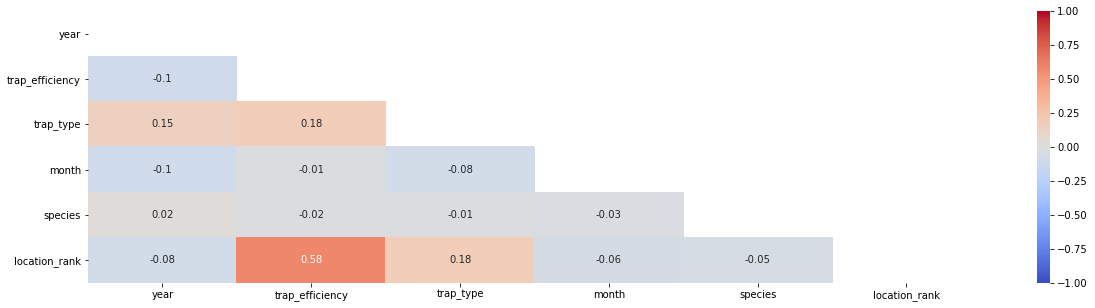

In [71]:
# checking the correlation anomg independent data set 
x_corr = X.corr()
mask = np.triu(x_corr)
plt.figure(figsize=(20,5))
sns.heatmap(x_corr.round(2), annot=True, vmax=1, vmin=-1, cmap="coolwarm", mask=mask)
plt.show()

####  Model 1.1

In [72]:
X_withconstant = sm.add_constant(X)
model_lr_first = sm.OLS(Y,X_withconstant.astype(float)).fit()
model_lr_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mosquito_number   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1660.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:15:07   Log-Likelihood:                -67352.
No. Observations:               17837   AIC:                         1.347e+05
Df Residuals:                   17830   BIC:                         1.348e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -478.1667     43.791    -10.919      0.000    -564.000    -392.333
year                0.2646      0.022     12.181      0.000       0.222       0.307
trap_efficiency    -0.2230      0.160     -1.391      0.164      -0.537       0.091
trap_type          -4.1804      0.412    -10.143      0.000      -4.988      -3.373
month              -0.8508      0.079    -10.730      0.000      -1.006      -0.695
species             7.2714      0.324     22.433      0.000       6.636       7.907
location_rank      -8.8462      0.120    -73.635      0.000      -9.082      -8.611
==============================================================================
Omnibus:                     5467.944   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15819.857
Skew:                           1.620   Prob(JB):                         0.00
Kurtosis:                       6.284   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Firstly,the equation of the model is

$$ y = -478.1667 + 0.0.2646 x_1 - 0.2230 x_2 - 4.1804 x_3 - 0.8508 x_4 + 7.2714 x_5 - 8.8462 x_6$$
 
Based on the p-values associated with every variable, it can be inferred that only `trap_efficiency` don't seem significant in predicting the mosquitoes number as the p-value is less than 0.05.<br>

In contrast,all the others features seems to be very significant as the p-value is 0.<br>

__Visualization of the coefficients__<br> 

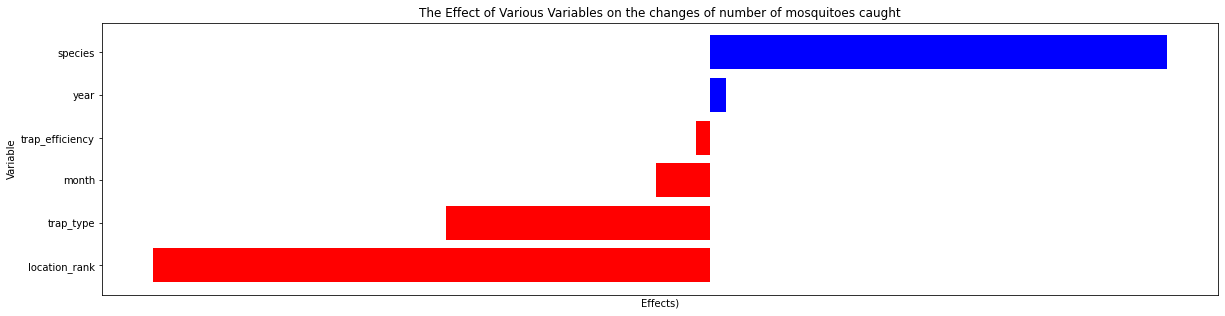

In [73]:
coefficient_Visualization(model_lr_first,"The Effect of Various Variables on the changes of number of mosquitoes caught")
    

__Interpretation of the coefficients__<br> 
- With one unit increase in `year`, there is a 0.2646 increase in the number of mosquitoes caught
- Changing the `trap type` from `GRAVIT` to `SENTINEL`,`CDC` and `OVI` trap_type decrease the number of mosquitoes caught upto 0.2230 times
- For any `months` other than the month from MAY to OCTOBER,the number of mosquitoes caught reduced upto 4.1804 times
- Mosquitoes species `CULEX RESTUANS` and `CULEX PIPIENS` increase the number of getting caught by 7.2714 compared to `CULEX TERRITANS`  and `CULEX SALINARIUS` 
- For every change in the `location rank` i.e from level 5 (highest) to level 1(lowest) , there is a decrease of 8.8462 numbers of mosquitoes caught.

##### Model Diagnostics

1.**Residuals**<br>

a. <b>Distribtuion plot
    

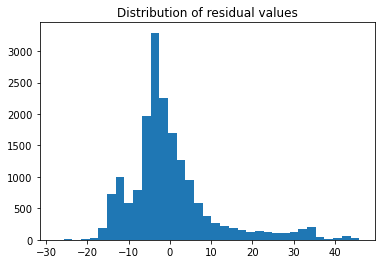

In [74]:
# Plotting the residuals of the model 1.1
plt.figure()

plt.hist(model_lr_first.resid, bins = 35)
plt.title('Distribution of residual values')

plt.show()

The distribution of residual values is close to a normal distribution.However for statistical significance, the Shaprio-Wilk test in conducted next.<br>

   b. <b> Shaprio-Wilk test</b>
    
    $H_0$:redual data are normally distributed.<br> 
    $H_1$:resudal  are not normally distributed<br>

In [75]:
# calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(model_lr_first.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.858217716217041, pvalue=0.0)


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value is 0.0 and is less than 0.05, Therefore we can reject the null hypothesis that the data are normally distributed.


   c. <b>Q-Q plot

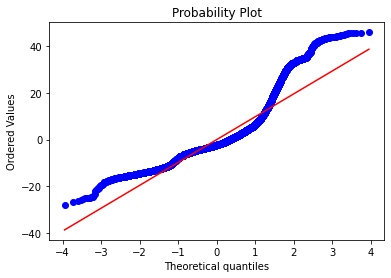

In [76]:
# Normal Q-Q plot
plt.figure()
stats.probplot(model_lr_first.resid, dist="norm", plot = plt);
plt.show()

2.**Homoscedasticity**<br>

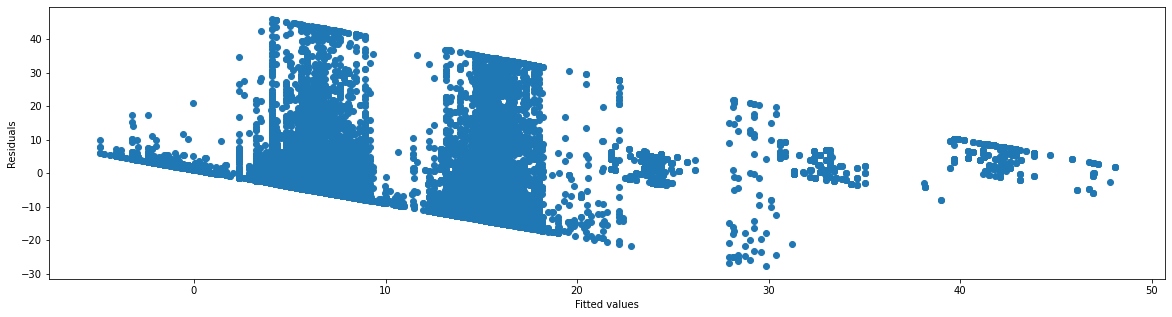

In [77]:
# Plot the residuals and the predicted values
plt.figure(figsize=(20,5))
plt.scatter(model_lr_first.fittedvalues, model_lr_first.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The residuals clearly do not look like random noise and exhibit a strong linear pattern. Therefore it violate the assumptions of linear regression that variance of error terms are similar across the values of the independent variables.

#### Model 1.2

As per outcome from the  model 1.1 , it is clear that the certain features need to be dropped for the model to be more robust.Based on this model summary, the `trap_efficiency` column is dropped in this model 1.2 as it don't seem significant in predicting the mosquitoes number 

**Feature modification-2 based on above inference**

1. Dropping the `trap_efficiency`column

In [78]:
X_new = X.drop(["trap_efficiency"],axis=1)
X_new.head()

,year,trap_type,month,species,location_rank
0,2019,1,9,1,4
1,2019,1,9,1,4
2,2019,1,9,1,4
3,2019,1,9,1,4
4,2019,1,9,1,5


**Creating the model  with the new data set**

In [79]:
X_new_withconstant = sm.add_constant(X_new)
model_lr_second = sm.OLS(Y,X_new_withconstant.astype(float)).fit()
model_lr_second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mosquito_number   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1991.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:15:08   Log-Likelihood:                -67353.
No. Observations:               17837   AIC:                         1.347e+05
Df Residuals:                   17831   BIC:                         1.348e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -483.2532     43.639    -11.074      0.000    -568.790    -397.717
year              0.2670      0.022     12.329      0.000       0.225       0.309
trap_type        -4.2422      0.410    -10.354      0.000      -5.045      -3.439
month            -0.8538      0.079    -10.771      0.000      -1.009      -0.698
species           7.2625      0.324     22.409      0.000       6.627       7.898
location_rank    -8.9391      0.100    -89.506      0.000      -9.135      -8.743
==============================================================================
Omnibus:                     5523.075   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16103.591
Skew:                           1.634   Prob(JB):                         0.00
Kurtosis:                       6.315   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


The equation of the model is

$$ y = -483.2532 + 0.2670 x_1 - 4.2422 x_2 - 0.8538 x_3 + 7.2625 x_4 - 8.9391 x_5$$
 
 
Based on the p-values associated with every variable of this new model, it can be inferred that all the features seems to be very significant as the p-value is 0.<br>


__Visualization of the coefficients__<br> 

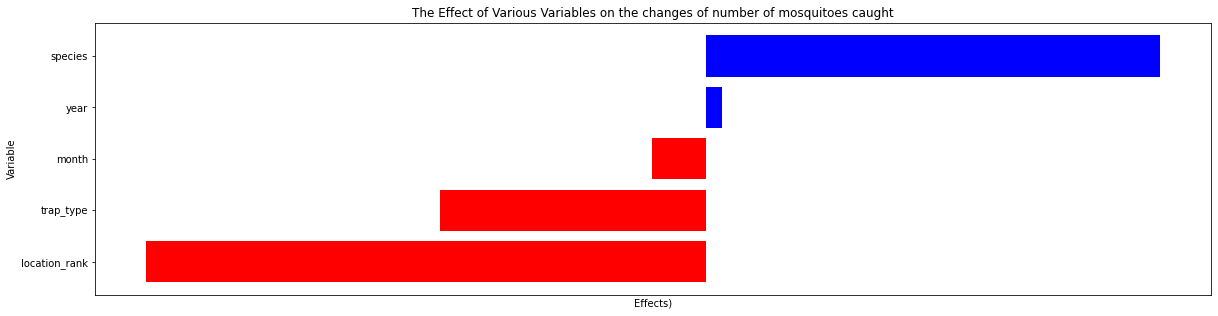

In [80]:
coefficient_Visualization(model_lr_second,"The Effect of Various Variables on the changes of number of mosquitoes caught")


__Interpretation of the coefficients__<br> 
- With one unit increase in `year`, there is a 0.2670 increase in the number of mosquitoes caught
- Changing the `trap type` from `GRAVIT` to `SENTINEL`,`CDC` and `OVI` trap_type decrease the number of mosquitoes caught upto 0.2670 times
- For any `months` other than the month from MAY to OCTOBER,the number of mosquitoes caught reduced upto 4.2422 times
- Mosquitoes species `CULEX RESTUANS` and `CULEX PIPIENS` increase the number of getting caught by 7.2625 compared to `CULEX TERRITANS`  and `CULEX SALINARIUS` 
- For every change in the `location rank` i.e from level 5 (highest) to level 1(lowest) , there is a decrease of 8.9391 numbers of mosquitoes caught.




##### Model Diagnostics

1.**Residuals**<br>

a. <b>Distribtuion plot
    

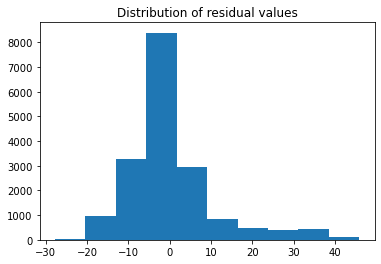

In [81]:
# Plotting the residuals of the model 1.1
plt.figure()

plt.hist(model_lr_second.resid)
plt.title('Distribution of residual values')

plt.show()

The distribution of residual values is close to a normal distribution.However for statistical significance, the Shaprio-Wilk test in conducted next.<br>

   b. <b> Shaprio-Wilk test</b>
    
    $H_0$:redual data are normally distributed.
    $H_1$:resudal  are not normally distributed

In [82]:
# calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(model_lr_first.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.858217716217041, pvalue=0.0)


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value is 0.0 and is less than 0.05, Therefore we can reject the null hypothesis that the data are normally distributed.


   c. <b>Q-Q plot

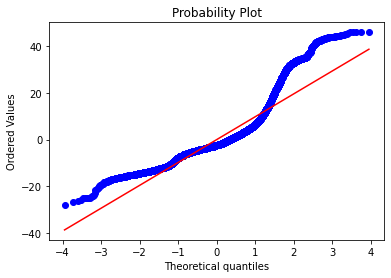

In [83]:
# Normal Q-Q plot
plt.figure()
stats.probplot(model_lr_second.resid, dist="norm", plot = plt);
plt.show()

2.**Homoscedasticity**<br>

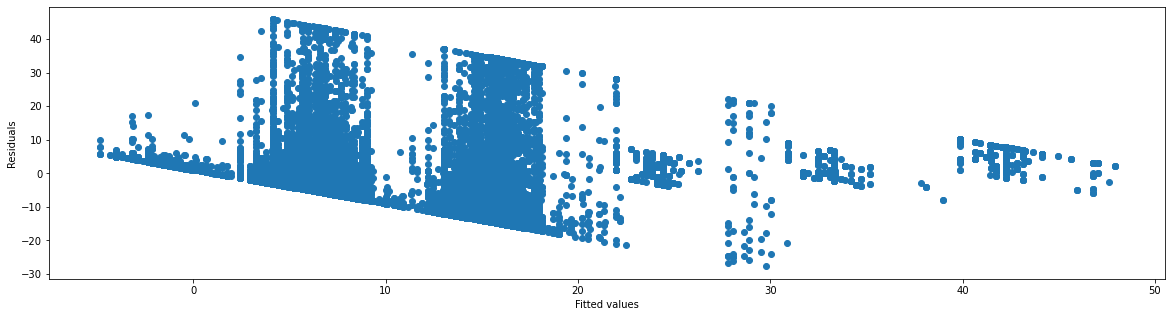

In [84]:
# Plot the residuals and the predicted values
plt.figure(figsize=(20,5))
plt.scatter(model_lr_second.fittedvalues, model_lr_second.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In this model also ,the residuals clearly do not look like random noise and exhibit a strong linear pattern. Therefore it violate the assumptions of linear regression that variance of error terms are similar across the values of the independent variables.

#### Summary
The approach taken for variable selection is through the process of as **backward selection**,i.e the initial model was build with all the variables free from multi collinearity.Then the feature are subtracted from the model one at a time based on their significance level(coefficient's p_value) and then the models are compared with the $R^2$ value. <br>

The model has a homoscedasticity  which means that the variances of all the observations are identical to one another as the error terms follow a strong linear pattern.This is possible as in the time of recording the data ,every time the number of mosquito caught cross the 50 mark ,it was considered as new record.This binds the dependent variable with the  range of<b> 0 - 50.<b>
    

Based on the above two model, the major insight drawn is that the species of the mosquito  contributes significantly in terms of the number of mosquitoes caught .
 

### Logistic Regression

#### Variable selection for model

In [85]:
X["mosquito_number"] = mosquito_df["mosquito_number"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             17837 non-null  int64
 1   trap_efficiency  17837 non-null  int64
 2   trap_type        17837 non-null  int64
 3   month            17837 non-null  int64
 4   species          17837 non-null  int64
 5   location_rank    17837 non-null  int64
 6   mosquito_number  17837 non-null  int64
dtypes: int64(7)
memory usage: 1.7 MB


In [86]:
Y = mosquito_df["wnv_present"]
Y.shape

(17837,)

##### Check for Multicollinearity

<Figure size 1440x1440 with 0 Axes>

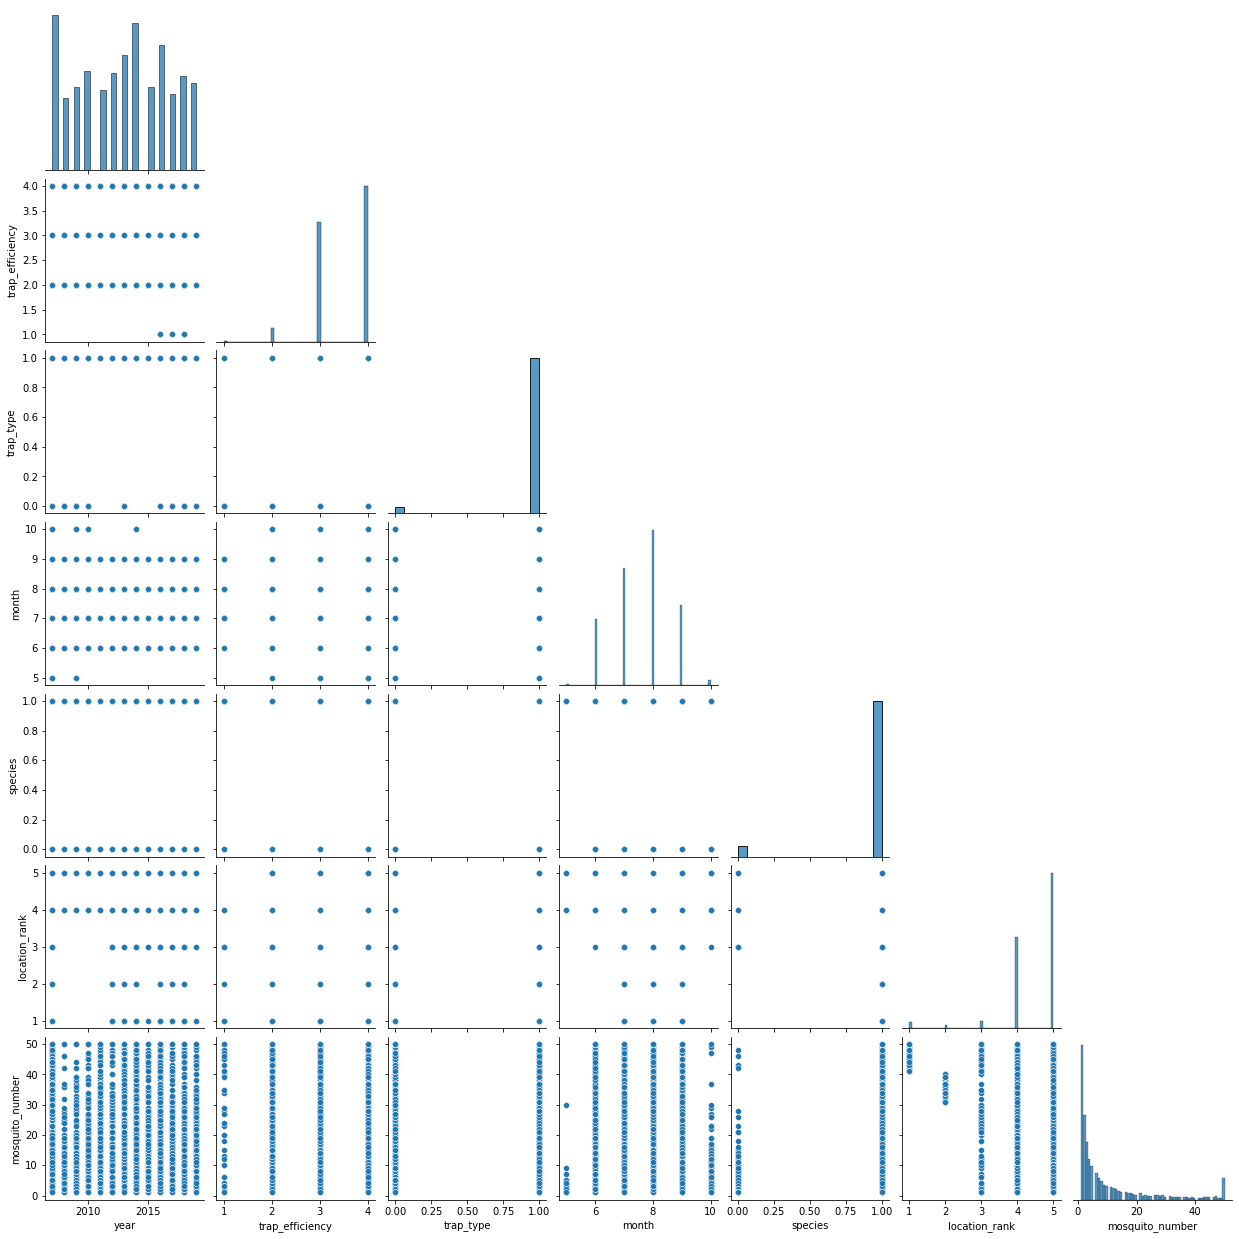

In [87]:
plt.figure(figsize=(20,20))
sns.pairplot(X, corner=True)
plt.show()

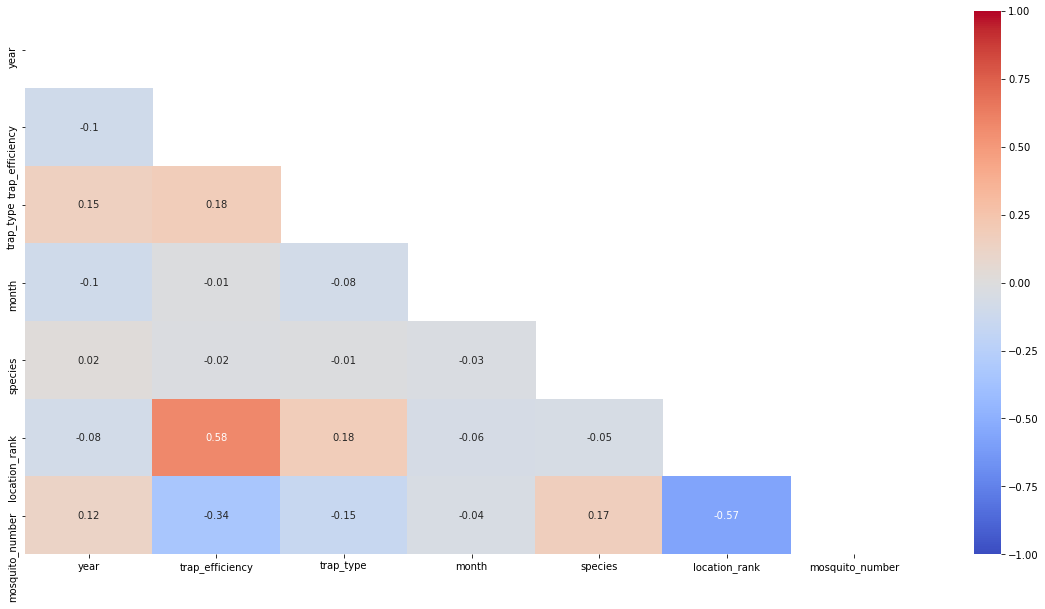

In [88]:
# checking the correlation among independent data set 
x_corr = X.corr()
mask = np.triu(x_corr)
plt.figure(figsize=(20,10))
sns.heatmap(x_corr.round(2), annot=True, vmax=1, vmin=-1, cmap="coolwarm", mask=mask)
plt.show()

With the help of above plot and the correlation matrix ,following inference are drawn:
- `location_rank` and `trap_efficiency` columns has strongly correlated
- `location_rank` and `mosquito_number` columns also had  strongly correlated 

Based on this hypothesis test is conducted to validate the significance of the correlation-coefficient

**1.mosquito_number- location_rank**<br>
$H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e ``location_rank`` is independent from "`mosquito_number`<br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `location_rank` is not independent from `mosquito_number`

In [89]:
r_correlation, p_value = stats.pearsonr(X["location_rank"], X["mosquito_number"])
print("r_correlation :",r_correlation)
print("p_value :",p_value)

r_correlation : -0.5714112720613751
p_value : 0.0


**2.trap_efficiency- location_rank**<br>
$H_0$: $ p =0 $<br>
correlation coefficient IS NOT significantly different from zero i.e ``location_rank`` is independent from "`trap_efficiency`<br>
 $H_1$: $\text{$ p \neq 0 $}$ <br>
correlation coefficient IS significantly different from zero i.e `location_rank` is not independent from `trap_efficiency`

In [90]:
r_correlation, p_value = stats.pearsonr(X["location_rank"], X["trap_efficiency"])
print("r_correlation :",r_correlation)
print("p_value :",p_value)                                  

r_correlation : 0.5753788561734592
p_value : 0.0


In both the cases, the null hypothesis is rejected , i.e the location_rank in not independent from the `trap_efficiency` and `mosquito_number` data. Therefore the `location_rank` column need to be dropped from the data set to avoid multicollinearity. 

**Feature modification-1.0 based on above inference**
1. Dropping the `location_rank` column

In [91]:
X_new= X.drop("location_rank",axis=1)
X_new.head()

,year,trap_efficiency,trap_type,month,species,mosquito_number
0,2019,3,1,9,1,2
1,2019,3,1,9,1,1
2,2019,3,1,9,1,2
3,2019,3,1,9,1,1
4,2019,4,1,9,1,9


#### Model 1.1

In [92]:
X_withconstant = sm.add_constant(X_new)
model_logit_first = sm.Logit(Y, X_withconstant).fit()
model_logit_first.summary()

Optimization terminated successfully.
         Current function value: 0.383935
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            wnv_present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17830
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                  0.2033
Time:                        11:15:22   Log-Likelihood:                -6848.3
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -221.3535     12.680    -17.457      0.000    -246.205    -196.502
year                0.1050      0.006     16.726      0.000       0.093       0.117
trap_efficiency    -0.0276      0.038     -0.733      0.463      -0.101       0.046
trap_type           0.4104      0.111      3.695      0.000       0.193       0.628
month               0.6799      0.024     27.923      0.000       0.632       0.728
species             1.9737      0.224      8.803      0.000       1.534       2.413
mosquito_number     0.0658      0.002     41.257      0.000       0.063       0.069
===================================================================================
"""

##### Model Interpretation

1. **P-Value**<br>
Based on the p-values in the summary table above, it is observed that the `trap_efficiency`is not relevant in predicting wnv presence (p-value is 0.463) where as all the other feature are relevant  for the prediction


2. **Odds Ratio**

In [93]:
index = model_logit_first.params.index
for i,param in enumerate(model_logit_first.params):
    print(f"Odd Ratio for {index[i]} :{round(np.exp(param),2)}")

Odd Ratio for const :0.0
Odd Ratio for year :1.11
Odd Ratio for trap_efficiency :0.97
Odd Ratio for trap_type :1.51
Odd Ratio for month :1.97
Odd Ratio for species :7.2
Odd Ratio for mosquito_number :1.07


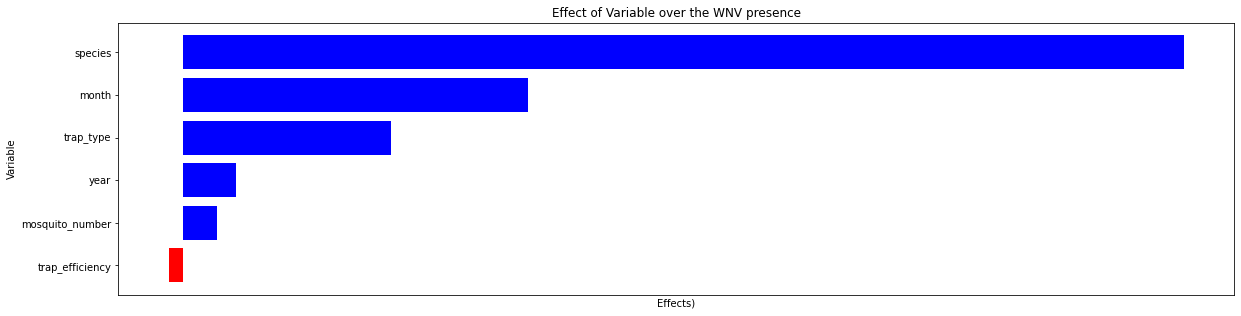

In [94]:
coefficient_Visualization(model_logit_first,"Effect of Variable over the WNV presence","logistc")

__Interpretation of the coefficients__

- Every year, the odds of a WNV presence increase by a factor of 1.11.
- For change in every month , the odds of a WNV presence increase by a factor of 1.97.
- The change in trap type from CDC" or "SENTINEL" or "OVI  to "GRAVID , the odds of a WNV presence mosquitoes trapped increase by a factor of 1.51.
- For every time the mosquito species like "CULEX PIPIENS" and "CULEX RESTUANS" are found, the odds of a WNV presence increase by a factor of 7.2.
- For every unit increase in mosquito_number, the odds of a WNV presence increase by a factor of 1.07.

##### Model Predictions

In [95]:
model_accuracy =[]
for threshold in np.linspace(.1,.9,8):
    wnv_presence_predictions = model_logit_first.predict(X_withconstant) > round(threshold,1) 
    accuracy = np.mean(wnv_presence_predictions == Y)*100
    model_accuracy.append(round(accuracy,2))
    print(f"With the threshold limit of {round(threshold,1)} ,the accuracy of the model is {round(accuracy,2)}%")

With the threshold limit of 0.1 ,the accuracy of the model is 57.64%
With the threshold limit of 0.2 ,the accuracy of the model is 74.75%
With the threshold limit of 0.3 ,the accuracy of the model is 80.6%
With the threshold limit of 0.4 ,the accuracy of the model is 82.82%
With the threshold limit of 0.6 ,the accuracy of the model is 83.27%
With the threshold limit of 0.7 ,the accuracy of the model is 82.42%
With the threshold limit of 0.8 ,the accuracy of the model is 81.77%
With the threshold limit of 0.9 ,the accuracy of the model is 81.29%


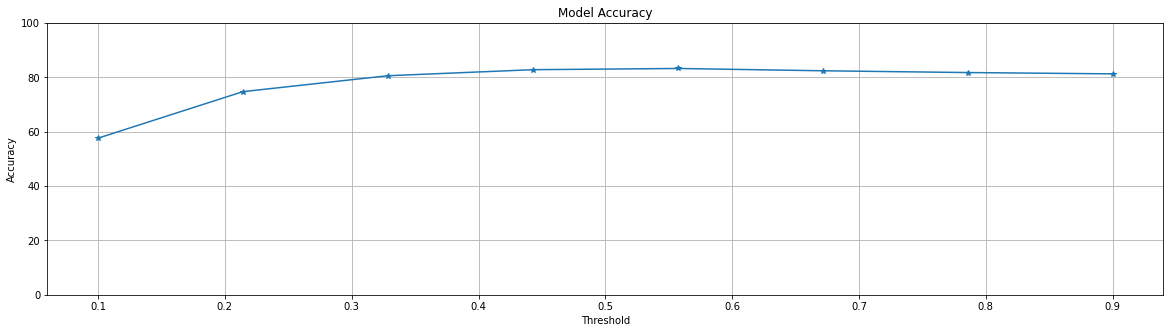

In [96]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(.1,.9,8),model_accuracy,marker="*")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0,100)
plt.grid()
plt.show()

#### Model 1.2

**Feature modification-2.0 based on inference drawn from the summary of the above logistic regression model 1.1**<br>

The `trap_efficiency`is not relevant in predicting wnv presence as the p-value (0.463) is above 0.05. Therefore the column is dropped.

In [97]:
X_significant = X_new.drop("trap_efficiency",axis=1)
X_significant.head()

,year,trap_type,month,species,mosquito_number
0,2019,1,9,1,2
1,2019,1,9,1,1
2,2019,1,9,1,2
3,2019,1,9,1,1
4,2019,1,9,1,9


In [98]:
X_withconstant = sm.add_constant(X_significant)
model_logit_second = sm.Logit(Y, X_withconstant).fit()
model_logit_second.summary()

Optimization terminated successfully.
         Current function value: 0.383950
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            wnv_present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17831
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                  0.2032
Time:                        11:15:23   Log-Likelihood:                -6848.5
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -222.5380     12.576    -17.695      0.000    -247.187    -197.889
year                0.1056      0.006     16.931      0.000       0.093       0.118
trap_type           0.3951      0.109      3.626      0.000       0.182       0.609
month               0.6805      0.024     27.961      0.000       0.633       0.728
species             1.9717      0.224      8.795      0.000       1.532       2.411
mosquito_number     0.0662      0.002     44.027      0.000       0.063       0.069
===================================================================================
"""

##### Model Interpretation

1. **P-Value**<br>
Based on the p-values in the summary table above, it is observed that the `trap_efficiency`is not relevant in predicting wnv presence (p-value is 0.463) where as all the other feature are relevant  for the prediction


2. **Odds Ratio**

In [99]:
index = model_logit_second.params.index
for i,param in enumerate(model_logit_second.params):
    print(f"Odd Ratio for {index[i]} :{round(np.exp(param),2)}")

Odd Ratio for const :0.0
Odd Ratio for year :1.11
Odd Ratio for trap_type :1.48
Odd Ratio for month :1.97
Odd Ratio for species :7.18
Odd Ratio for mosquito_number :1.07


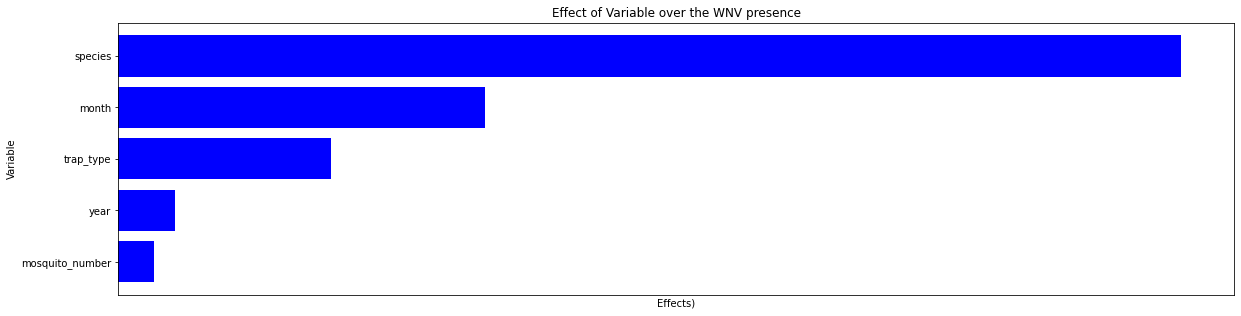

In [100]:
coefficient_Visualization(model_logit_second,"Effect of Variable over the WNV presence","logistc")

__Interpretation of the coefficients__

- Every year, the odds of a WNV presence increase by a factor of 1.11.
- For change in every month , the odds of a WNV presence increase by a factor of 1.48.
- The change in trap type from CDC" or "SENTINEL" or "OVI  to "GRAVID , the odds of a WNV presence mosquitoes trapped increase by a factor of 1.97.
- For every time the mosquito species like "CULEX PIPIENS" and "CULEX RESTUANS" are found, the odds of a WNV presence increase by a factor of 7.18
- For every unit increase in mosquito_number, the odds of a WNV presence increase by a factor of 1.07.

##### Model Predictions

In [101]:
model_accuracy =[]
for threshold in np.linspace(.1,.9,8):
    wnv_presence_predictions = model_logit_second.predict(X_withconstant) > round(threshold,1) 
    accuracy = np.mean(wnv_presence_predictions == Y)*100
    model_accuracy.append(round(accuracy,2))
    print(f"With the threshold limit of {round(threshold,1)} ,the accuracy of the model is {round(accuracy,2)}%")

With the threshold limit of 0.1 ,the accuracy of the model is 57.68%
With the threshold limit of 0.2 ,the accuracy of the model is 74.64%
With the threshold limit of 0.3 ,the accuracy of the model is 80.59%
With the threshold limit of 0.4 ,the accuracy of the model is 82.8%
With the threshold limit of 0.6 ,the accuracy of the model is 83.27%
With the threshold limit of 0.7 ,the accuracy of the model is 82.4%
With the threshold limit of 0.8 ,the accuracy of the model is 81.77%
With the threshold limit of 0.9 ,the accuracy of the model is 81.29%


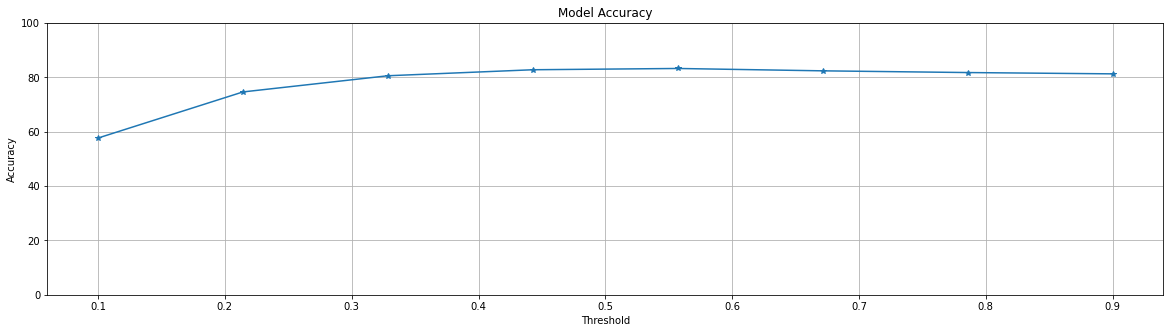

In [102]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(.1,.9,8),model_accuracy,marker="*")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0,100)
plt.grid()
plt.show()

#### Summary

Based on the above two model,the following conclusion are drawn
- The species of the mosquito , the time of the year (month) and the trap type are the three most important factor for the presence of the wnv in the mosquitoes trapped.

- Number of mosquitoes trapped donot have a very significant impact over the WNV presence 


---